### [기후] 단계적 변수 추출 - Factor Anaylisis

In [0]:
# load libraris 
# load libraries 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline 
import platform #운영 체제 
import seaborn as sns
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False 

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path="c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system')

    
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.decomposition import PCA, FactorAnalysis
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer import FactorAnalyzer

In [0]:
# load data
climate = pd.read_csv('../oniondata/adjusted_climate.csv', encoding='utf-8')
air = pd.read_csv('../oniondata/air_merged.csv', encoding = 'utf-8')
soil = pd.read_csv('../oniondata/soil_final_for_merge.csv', encoding = 'utf-8')
output=pd.read_csv('../oniondata/onion_unit_output.csv', encoding = 'utf-8')

In [0]:
# merge climate and output data into one df 
climate = pd.merge(climate,output,on=['year_local','area','year'])
climate = climate.iloc[:,3:]
climate

,평균기온 7월,평균기온 8월,평균기온 9월,평균기온 10월,평균기온 11월,평균기온 12월,평균기온 1월,평균기온 2월,평균기온 3월,평균기온 4월,...,순간최대풍속 10월,순간최대풍속 11월,순간최대풍속 12월,순간최대풍속 1월,순간최대풍속 2월,순간최대풍속 3월,순간최대풍속 4월,순간최대풍속 5월,순간최대풍속 6월,10a당 생산량 (kg)
0,22.827957,24.297133,18.242593,11.864875,7.723704,-1.206093,-4.854480,-2.994444,2.805018,10.331852,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4061
1,25.051613,25.911828,20.493023,13.147312,8.160000,-0.915054,-4.255914,-1.811905,4.422581,11.940000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4061
2,26.101075,27.240502,21.902222,15.447670,11.091111,3.099642,1.022581,1.350794,6.797849,12.648519,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5121
3,24.853666,26.011144,20.131818,13.698534,9.552424,1.166276,-1.537243,-0.499675,4.974194,11.554545,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6300
4,26.590323,27.625806,22.496667,15.925806,11.573333,3.732258,1.438710,1.353571,7.116129,13.536667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,26.406048,26.978455,21.398333,14.785887,9.688333,4.221023,1.875893,3.102232,7.900446,11.381696,...,9.811694,7.856667,10.423864,10.804018,10.716518,12.120982,9.909375,9.979435,8.046250,6873
431,26.887500,27.388710,20.442917,12.579839,6.805000,1.428977,-0.809375,1.659375,6.600000,11.473661,...,7.349597,5.769583,6.481818,6.341964,6.934821,8.884375,7.380357,7.684274,6.426582,7957
432,25.447312,28.087097,23.584444,17.760215,14.137778,9.384848,6.883333,7.928571,10.902381,14.417857,...,10.611828,8.973333,11.909091,11.352381,10.565476,11.692857,9.042857,8.007527,7.308889,7875
433,24.305161,27.466452,20.138667,12.011613,7.014000,0.330909,-1.005714,0.845714,6.144286,11.113571,...,7.002581,5.654667,6.339091,6.110714,6.544286,8.260000,7.385000,7.576129,6.124000,5500


In [0]:
# confirm if dtype is float for future modeling
climate.dtypes

평균기온 7월          float64
평균기온 8월          float64
평균기온 9월          float64
평균기온 10월         float64
평균기온 11월         float64
                  ...   
순간최대풍속 3월        float64
순간최대풍속 4월        float64
순간최대풍속 5월        float64
순간최대풍속 6월        float64
10a당 생산량 (kg)     object
Length: 121, dtype: object

In [0]:
climate

,평균기온 7월,평균기온 8월,평균기온 9월,평균기온 10월,평균기온 11월,평균기온 12월,평균기온 1월,평균기온 2월,평균기온 3월,평균기온 4월,...,순간최대풍속 10월,순간최대풍속 11월,순간최대풍속 12월,순간최대풍속 1월,순간최대풍속 2월,순간최대풍속 3월,순간최대풍속 4월,순간최대풍속 5월,순간최대풍속 6월,10a당 생산량 (kg)
0,22.827957,24.297133,18.242593,11.864875,7.723704,-1.206093,-4.854480,-2.994444,2.805018,10.331852,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4061
1,25.051613,25.911828,20.493023,13.147312,8.160000,-0.915054,-4.255914,-1.811905,4.422581,11.940000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4061
2,26.101075,27.240502,21.902222,15.447670,11.091111,3.099642,1.022581,1.350794,6.797849,12.648519,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5121
3,24.853666,26.011144,20.131818,13.698534,9.552424,1.166276,-1.537243,-0.499675,4.974194,11.554545,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6300
4,26.590323,27.625806,22.496667,15.925806,11.573333,3.732258,1.438710,1.353571,7.116129,13.536667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,26.406048,26.978455,21.398333,14.785887,9.688333,4.221023,1.875893,3.102232,7.900446,11.381696,...,9.811694,7.856667,10.423864,10.804018,10.716518,12.120982,9.909375,9.979435,8.046250,6873
431,26.887500,27.388710,20.442917,12.579839,6.805000,1.428977,-0.809375,1.659375,6.600000,11.473661,...,7.349597,5.769583,6.481818,6.341964,6.934821,8.884375,7.380357,7.684274,6.426582,7957
432,25.447312,28.087097,23.584444,17.760215,14.137778,9.384848,6.883333,7.928571,10.902381,14.417857,...,10.611828,8.973333,11.909091,11.352381,10.565476,11.692857,9.042857,8.007527,7.308889,7875
433,24.305161,27.466452,20.138667,12.011613,7.014000,0.330909,-1.005714,0.845714,6.144286,11.113571,...,7.002581,5.654667,6.339091,6.110714,6.544286,8.260000,7.385000,7.576129,6.124000,5500


In [0]:
# transform 10a당 생산량 (kg)s '-' to 0
climate = climate.replace('-', 0)

In [0]:
climate.dtypes

평균기온 7월          float64
평균기온 8월          float64
평균기온 9월          float64
평균기온 10월         float64
평균기온 11월         float64
                  ...   
순간최대풍속 3월        float64
순간최대풍속 4월        float64
순간최대풍속 5월        float64
순간최대풍속 6월        float64
10a당 생산량 (kg)     object
Length: 121, dtype: object

In [0]:
# Scaling 
climate_columns = climate.columns.tolist()

scaler = MinMaxScaler()
climate_scaled = scaler.fit_transform(climate)
climate_scaled = pd.DataFrame(climate_scaled, columns = climate_columns)

climate_scaled

,평균기온 7월,평균기온 8월,평균기온 9월,평균기온 10월,평균기온 11월,평균기온 12월,평균기온 1월,평균기온 2월,평균기온 3월,평균기온 4월,...,순간최대풍속 10월,순간최대풍속 11월,순간최대풍속 12월,순간최대풍속 1월,순간최대풍속 2월,순간최대풍속 3월,순간최대풍속 4월,순간최대풍속 5월,순간최대풍속 6월,10a당 생산량 (kg)
0,0.390530,0.536933,0.297459,0.151368,0.437209,0.288114,0.219891,0.049930,0.065685,0.316907,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.433497
1,0.574046,0.693454,0.539888,0.275519,0.470633,0.306915,0.257361,0.140811,0.238171,0.501900,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.433497
2,0.660656,0.822250,0.691695,0.498214,0.695182,0.566260,0.587797,0.383871,0.491455,0.583404,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.546648
3,0.557709,0.703081,0.500977,0.328882,0.577305,0.441367,0.427551,0.241659,0.296992,0.457559,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.672502
4,0.701033,0.859600,0.755732,0.544501,0.732125,0.607127,0.613847,0.384085,0.525394,0.685572,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,0.685825,0.796848,0.637413,0.434147,0.587717,0.638700,0.641215,0.518473,0.609029,0.437676,...,0.804822,0.562261,0.661189,0.673757,0.740164,0.817827,0.742832,0.842490,0.750816,0.733668
431,0.725559,0.836617,0.534490,0.220583,0.366828,0.458337,0.473116,0.407586,0.470358,0.448255,...,0.602864,0.412900,0.411144,0.395496,0.478971,0.599446,0.553250,0.648727,0.599681,0.849381
432,0.606702,0.904315,0.872914,0.722088,0.928584,0.972279,0.954682,0.889388,0.929136,0.786939,...,0.870455,0.642176,0.755398,0.707954,0.729732,0.788940,0.677875,0.676017,0.682011,0.840628
433,0.512442,0.844153,0.501715,0.165574,0.382840,0.387403,0.460825,0.345055,0.421763,0.406832,...,0.574400,0.404676,0.402091,0.381075,0.451998,0.557319,0.553598,0.639597,0.571446,0.587105


In [0]:
X = climate_scaled.iloc[:,:-1]
y = climate_scaled.iloc[:,-1]

### Factor Analysis 적용

##### FA 적용 가능 여부 판단

In [0]:
# Adequency Test: KMO should be btw 0 and 1, and more than 0.6
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(X)

In [0]:
kmo_model

nan

In [0]:
# Adequency Test: p-value should be less than 0.05 (statistically significant)

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(X)
chi_square_value, p_value

/opt/anaconda3/lib/python3.7/site-packages/numpy/linalg/linalg.py:2116: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


(nan, nan)

- 잠정적 이유 1: df에 nan이 있거나 모든 컬럼이 0인 값 있음 
- 잠정적 이유 2: correlation이 1 이나 -1인 컬럼들 존재

In [0]:
#모든 컬럼이 0인 값 제거 
zeros = []
for i in X.columns.tolist():
    if X[i].mean() == 0:
        zeros.append(i)
zeros

for i in zeros:
    X.drop(i,axis=1, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(X)
kmo_model

0.8887357483980157

In [0]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(X)
chi_square_value, p_value

(119542.78162384286, 0.0)

#### Factor 개수 선택

In [0]:
# installed factor-analyzer-0.2.3
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.analyze(X, 20, rotation=None)
fa.loadings

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15,Factor16,Factor17,Factor18,Factor19,Factor20
평균기온 7월,0.237639,0.421499,0.418964,0.501066,-0.000425,-0.277744,-0.252309,-0.049132,0.253888,0.012873,-0.124847,-0.019707,0.014891,-0.043870,-0.104680,0.122883,0.013542,-0.038023,-0.056183,-0.054590
평균기온 8월,0.398218,0.442312,0.290376,0.513507,0.075555,-0.124690,-0.322219,-0.117923,0.009136,-0.158136,0.028026,0.010434,-0.133710,0.039686,0.067752,-0.232431,-0.008956,0.004917,-0.076988,-0.114156
평균기온 9월,0.550810,0.515004,0.020268,0.301872,0.158553,0.268776,-0.080056,-0.044441,-0.011863,0.052442,0.009315,-0.151556,0.057388,-0.241613,-0.128299,0.087382,0.147134,0.096690,-0.057884,-0.193655
평균기온 10월,0.666391,0.514604,-0.237897,0.173558,0.021572,0.071173,-0.057731,-0.114331,-0.161720,-0.115693,0.121228,-0.167303,-0.098744,-0.014664,-0.069253,-0.000083,-0.122873,0.079626,0.080022,0.023665
평균기온 11월,0.570198,0.484714,-0.408776,-0.033327,-0.034091,0.083001,0.084244,0.008183,-0.059362,-0.140938,-0.037128,0.186543,-0.010514,-0.148375,-0.272814,-0.077548,0.186674,-0.068484,-0.067218,0.069581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
순간최대풍속 2월,0.657847,-0.619096,-0.128404,0.192539,-0.013085,-0.029159,0.082753,-0.032503,-0.113239,0.160753,0.026005,-0.099031,-0.150565,0.091715,-0.055624,0.032812,0.102078,-0.049525,-0.019162,0.093309
순간최대풍속 3월,0.645871,-0.647524,-0.085373,0.211317,-0.003214,-0.046995,0.059817,-0.098893,-0.066010,0.111474,-0.011365,-0.125779,-0.124829,0.046835,-0.049219,0.026757,0.077279,0.022836,-0.063714,0.101024
순간최대풍속 4월,0.628164,-0.666819,-0.054195,0.203942,-0.002429,-0.026407,0.083291,-0.080529,-0.059972,0.125272,0.007595,-0.138064,-0.134225,0.070746,-0.069939,0.005460,0.064710,0.000701,-0.027740,0.076839
순간최대풍속 5월,0.647942,-0.656317,-0.040908,0.218268,-0.003191,-0.047549,0.081509,-0.073503,-0.063481,0.098746,0.017903,-0.123457,-0.138005,0.105571,-0.023105,0.029715,0.038500,0.016729,-0.053533,0.066275


In [0]:
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

,Original_Eigenvalues
0,27.006118
1,17.422792
2,11.538720
3,8.005137
4,5.529738
...,...
109,0.001407
110,0.001201
111,0.000830
112,0.000650


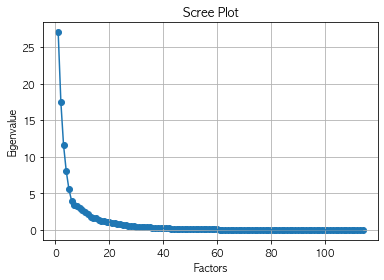

In [0]:
# Create scree plot using matplotlib
plt.scatter(range(1,X.shape[1]+1),ev)
plt.plot(range(1,X.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()
# Number eigenvalues greater than 1 considered as the number of factors.

In [0]:
ev.sort_values('Original_Eigenvalues').iloc[55:65,:]
# 그래프가 최초로 1 이하되는 값 추출: 49 ---> Factor는 94개 이하여야함 

#ev_st = ev.sort_values('Original_Eigenvalues')
#ev_st[ev_st['Original_Eigenvalues'].gt(1)] --> 틀린 유추 

#아이젠 벨류가 1보다 크면서 1과 가장 가까운 factor: 113개 
#index_value = ev[(ev['Original_Eigenvalues'] - 1).apply(abs) > 0].sort_values('Original_Eigenvalues')
#index_value --> 틀린 유추 

,Original_Eigenvalues
58,0.053238
57,0.055576
56,0.061389
55,0.064841
54,0.068957
53,0.073638
52,0.075729
51,0.091259
50,0.099802
49,0.102798


Eigenvalue > 1
Programs usually have a default cut-off for the number of generated factors, such as all factors with an eigenvalue of ≥1.

This is because a factor with an eigenvalue of 1 accounts for as much variance as a single variable, and the logic is that only factors that explain at least the same amount of variance as a single variable is worth keeping.

**But often a cut-off of 1 results in more factors than the user bargained for or  leaving out a theoretically important factor whose eigenvalue is just below 1.  So use this criterion only with extreme caution**


#### Performing Factor Analysis

In [0]:
fa = FactorAnalyzer()
fa.analyze(X, 5, rotation="varimax")
analysis_df = fa.loadings

In [0]:
fa.loadings

,Factor1,Factor2,Factor3,Factor4,Factor5
평균기온 7월,-0.047868,0.188248,0.758496,0.147832,0.113451
평균기온 8월,0.061759,0.357936,0.710839,0.160677,0.178466
평균기온 9월,0.093848,0.617237,0.435902,0.231344,0.199842
평균기온 10월,0.147626,0.826962,0.239220,0.166844,0.048970
평균기온 11월,0.064754,0.834640,-0.021907,0.125803,-0.039901
...,...,...,...,...,...
순간최대풍속 2월,0.920194,0.079581,-0.018659,-0.065230,-0.079624
순간최대풍속 3월,0.935587,0.032418,0.008615,-0.061282,-0.070185
순간최대풍속 4월,0.933916,-0.007114,0.013089,-0.050807,-0.074083
순간최대풍속 5월,0.942740,0.003925,0.037584,-0.041138,-0.073396


In [0]:
fa.get_factor_variance()

,Factor1,Factor2,Factor3,Factor4,Factor5
SS Loadings,21.257556,18.254257,10.009472,12.655793,5.838355
Proportion Var,0.186470,0.160125,0.087802,0.111016,0.051214
Cumulative Var,0.186470,0.346595,0.434397,0.545413,0.596627


#### 결과 해석

In [0]:
for i in analysis_df.columns.tolist():
    print(i, ':', analysis_df[analysis_df[i]>= 0.5].index.values)

Factor1 : ['운량 7월' '운량 8월' '운량 9월' '운량 10월' '운량 11월' '운량 12월' '운량 1월' '운량 2월'
 '운량 3월' '운량 4월' '운량 5월' '운량 6월' '순간최대풍속 7월' '순간최대풍속 8월' '순간최대풍속 9월'
 '순간최대풍속 10월' '순간최대풍속 11월' '순간최대풍속 12월' '순간최대풍속 1월' '순간최대풍속 2월'
 '순간최대풍속 3월' '순간최대풍속 4월' '순간최대풍속 5월' '순간최대풍속 6월']
Factor2 : ['평균기온 9월' '평균기온 10월' '평균기온 11월' '평균기온 12월' '평균기온 1월' '평균기온 2월' '평균기온 3월'
 '평균기온 4월' '최고기온 10월' '최고기온 11월' '최고기온 12월' '최고기온 1월' '최고기온 2월' '최고기온 3월'
 '최저기온 8월' '최저기온 9월' '최저기온 10월' '최저기온 11월' '최저기온 12월' '최저기온 1월' '최저기온 2월'
 '최저기온 3월' '최저기온 4월' '최저기온 5월']
Factor3 : ['평균기온 7월' '평균기온 8월' '평균기온 5월' '평균기온 6월' '최고기온 7월' '최고기온 8월' '최고기온 9월'
 '최고기온 4월' '최고기온 5월' '최고기온 6월' '최저기온 7월' '최저기온 8월' '일조시간 4월']
Factor4 : ['일사량 7월' '일사량 8월' '일사량 9월' '일사량 10월' '일사량 11월' '일사량 12월' '일사량 1월'
 '일사량 2월' '일사량 3월' '일사량 4월' '일사량 5월' '일사량 6월']
Factor5 : ['습도 7월' '습도 8월' '습도 12월' '습도 1월' '습도 2월' '습도 3월' '습도 4월' '습도 5월' '습도 6월']


## 결과 논의 필요

In [0]:
컬럼 기후 대기 토양 합쳐서 모델 만들때 사용 

SyntaxError: invalid syntax (<ipython-input-25-1fa20d163c05>, line 1)